                                             Домашнє завдання N 3

                                        Лінійна регресія та її реалізація

Імпортуємо потрібні бібліотеки:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

Завантаження та вивід перших рядків датасету Housing.csv:

In [2]:
housing_data = pd.read_csv('Housing.csv')

housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Знаходимо найкращі параметри w(омега) для датасету прогнозуючу ціну на будинок залежно
 від площі, кількості ванних кімнат та кількості спалень:

In [3]:
# Вибір ознак і цільової змінної
X = housing_data[['area', 'bedrooms', 'bathrooms']].values
y = housing_data['price'].values

# Нормалізація ознак
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_with_bias = np.c_[np.ones(X_scaled.shape[0]), X_scaled]


Відображення перших 5 рядків нормалізованих даних з одиницями:

In [4]:
X_scaled_with_bias[:5]

array([[ 1.        ,  1.04672629,  1.40341936,  1.42181174],
       [ 1.        ,  1.75700953,  1.40341936,  5.40580863],
       [ 1.        ,  2.21823241,  0.04727831,  1.42181174],
       [ 1.        ,  1.08362412,  1.40341936,  1.42181174],
       [ 1.        ,  1.04672629,  1.40341936, -0.57018671]])

Створимо функцію для обчислення функції втрат у векторному вигляді:

In [5]:
def cost(h, y):
  return np.mean((h-y)**2)/2

Створимо клас для лінійної регресії CustomLinearRegression:

In [6]:
class CustomLinearRegression:
  def __init__(self, lr: float = 0.01, thr=0.00001, n_epochs = 100):
    self.lr = lr
    self.thr = thr
    self.n_epochs = n_epochs
    self.w = np.random.rand(X_scaled_with_bias.shape[1])

  # Функція гіпотези лінійної регресії у векторному вигляді
  def predict(self, X):
    return self.w@X.T
  
  # Один крок градієнтного спуску
  def update_weights(self, X, y):
    m = len(y)
    h = self.predict(X)
    self.w = self.w - self.lr / m * X.T @ (h-y)

  # Навчання моделі та виведення вартості функції втрат під час навчання
  def fit(self, X, y):
    last_cost = 10000000
    for i in range(self.n_epochs):
      self.update_weights(X, y)
      new_cost = cost(self.predict(X), y)

      if i % (self.n_epochs//100) == 0:
        print(f"cost function = {last_cost}")

      if abs(last_cost - new_cost) < self.thr:
        break

      last_cost = new_cost

Ініціалізація та тренування CustomLinearRegression моделі:

In [7]:
cust_regression = CustomLinearRegression(lr=0.01, thr=0.00001, n_epochs=1000)
w_cust_regression = cust_regression.fit(X_scaled_with_bias, y)
w_cust_regression = cust_regression.w

cost function = 10000000
cost function = 10827794087170.5
cost function = 8978438081470.844
cost function = 7476706555093.808
cost function = 6256434716273.174
cost function = 5264256514294.554
cost function = 4457078038205.603
cost function = 3800062104495.492
cost function = 3265017636621.7
cost function = 2829110279115.831
cost function = 2473828467994.8647
cost function = 2184153053538.0945
cost function = 1947889425781.9192
cost function = 1755129605705.2974
cost function = 1597818457456.6948
cost function = 1469403450865.3992
cost function = 1364551569194.284
cost function = 1278920254897.5808
cost function = 1208971902552.0955
cost function = 1151823488270.9756
cost function = 1105124582013.9722
cost function = 1066958311833.2009
cost function = 1035760906669.7863
cost function = 1010256291413.6539
cost function = 989402887547.0708
cost function = 972350318760.6279
cost function = 958404160326.4303
cost function = 946997225048.3895
cost function = 937666164222.9485
cost function

Знаходимо ці ж параметри за допомогою аналітичного рішення:

In [8]:
def analytical_solution(X, y):
    return np.linalg.pinv(X) @ y

Застосування аналітичного рішення для пошуку найкращих параметрів:

In [9]:
w_analytical = analytical_solution(X_scaled_with_bias, y)

Порівняймо отримані результати:

In [10]:
f"Найкращі параметри за допомогою методу градієнтного спуску - {w_cust_regression}"


'Найкращі параметри за допомогою методу градієнтного спуску - [4766523.46208905  821199.2672256   300296.28605662  695515.99571558]'

In [11]:
f"Найкращі параметри за допомогою аналітичного рішення - {w_analytical}"

'Найкращі параметри за допомогою аналітичного рішення - [4766729.24770642  821214.14349519  299983.57107963  695808.52272537]'

Графік порівняння реальних і прогнозованих цін:

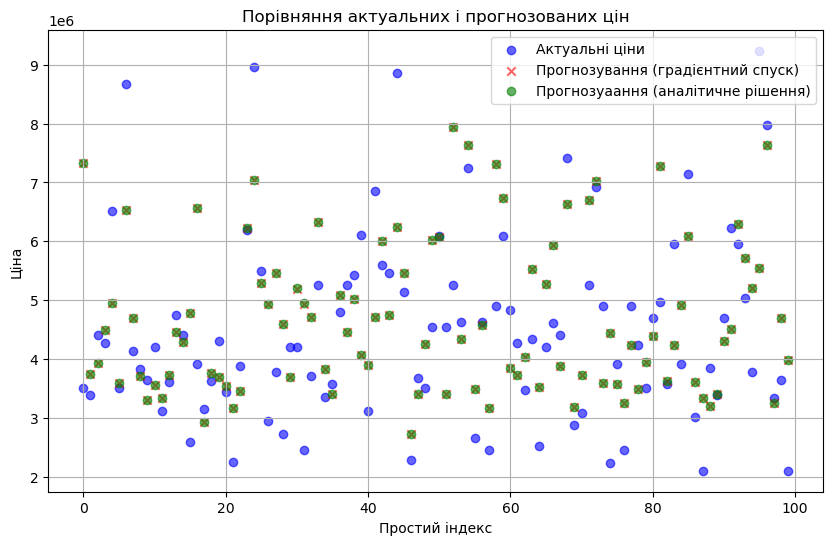

In [19]:
# Вибір підмножини даних для порівняння прогнозів
subset_indices = np.random.choice(np.arange(len(y)), size=100, replace=False)
X_subset = X_scaled_with_bias[subset_indices]
y_subset = y[subset_indices]

# Розрахунок прогнозів
predictions_gradient_descent = cust_regression.predict(X_subset)
predictions_analytical = np.dot(X_subset, w_analytical)


plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(y_subset)), y_subset, color='blue', label='Актуальні ціни', alpha=0.6)
plt.scatter(np.arange(len(y_subset)), predictions_gradient_descent, color='red', marker='x', label='Прогнозування (градієнтний спуск)', alpha=0.6)
plt.scatter(np.arange(len(y_subset)), predictions_analytical, color='green', marker='o', label='Прогнозуаання (аналітичне рішення)', alpha=0.6)
plt.xlabel('Простий індекс')
plt.ylabel('Ціна')
plt.title('Порівняння актуальних і прогнозованих цін')
plt.legend()
plt.grid(True)
plt.show()